<a href="https://colab.research.google.com/github/Legacywave1/Satellite-imagery/blob/main/Satellite_Imagery_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install patchify

In [ ]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
import random
from tensorflow.keras.utils import to_categorical

In [ ]:
!ls -lah '/content/drive/MyDrive/Dataset/Semantic segmentation dataset'

total 33K
-rw------- 1 root root  548 Feb 12  2020  classes.json
drwx------ 4 root root 4.0K Dec 23 12:37 'Tile 1'
drwx------ 4 root root 4.0K Dec 23 12:37 'Tile 2'
drwx------ 4 root root 4.0K Dec 23 12:37 'Tile 3'
drwx------ 4 root root 4.0K Dec 23 12:37 'Tile 4'
drwx------ 4 root root 4.0K Dec 23 12:37 'Tile 5'
drwx------ 4 root root 4.0K Dec 23 12:37 'Tile 6'
drwx------ 4 root root 4.0K Dec 23 12:37 'Tile 7'
drwx------ 4 root root 4.0K Dec 23 12:37 'Tile 8'


In [ ]:
dataset_root_folder = '/content/drive/MyDrive/Dataset/'

In [ ]:
dataset_name = 'Semantic segmentation dataset'

In [ ]:
for path, subdir, files  in os.walk(os.path.join(dataset_root_folder, dataset_name)):
  dir_name = path.split(os.path.sep)[-1]
  #print(dir_name)
  if dir_name == 'images':
    images = os.listdir(path)
    print(path)
    for i, image in enumerate(images):
      if (image.endswith('jpg')):
        print(image)
        a = True
    #print(images)

NameError: name 'os' is not defined

In [ ]:
import cv2

array([[[ 20,  54, 108],
        [  0,  27,  83],
        [  8,  42, 102],
        ...,
        [177, 182, 183],
        [128, 131, 139],
        [ 87,  91, 102]],

       [[ 22,  53, 108],
        [  0,  26,  82],
        [  8,  39, 100],
        ...,
        [164, 168, 169],
        [119, 122, 130],
        [ 86,  90, 101]],

       [[ 29,  59, 114],
        [  0,  28,  85],
        [ 13,  42, 103],
        ...,
        [164, 169, 168],
        [120, 123, 131],
        [ 98, 100, 111]],

       ...,

       [[101, 100, 104],
        [137, 136, 140],
        [111, 113, 114],
        ...,
        [ 13,   6,  13],
        [ 17,   9,  19],
        [ 22,  14,  24]],

       [[ 86,  85,  89],
        [133, 132, 136],
        [120, 122, 123],
        ...,
        [ 24,  15,  25],
        [ 31,  22,  32],
        [ 31,  22,  32]],

       [[105, 104, 108],
        [101, 100, 104],
        [104, 106, 107],
        ...,
        [ 32,  23,  33],
        [ 37,  28,  38],
        [ 31,  22,  32]]], dtype=uint8)
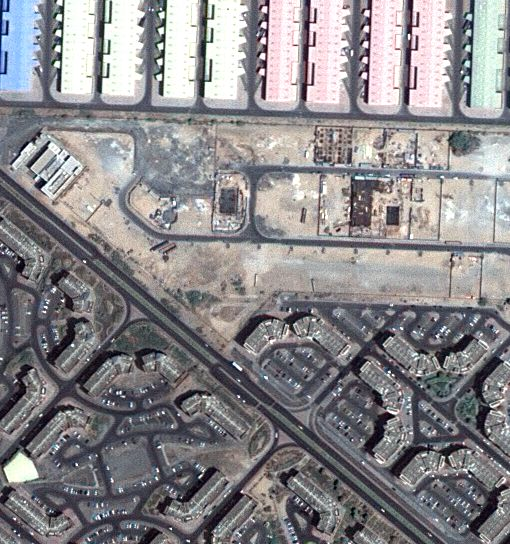

In [ ]:
image = cv2.imread(f'{dataset_root_folder}{dataset_name}/Tile 2/images/image_part_002.jpg')
image

array([[[ 60,  16, 152],
        [ 60,  16, 152],
        [ 60,  16, 152],
        ...,
        [ 60,  16, 152],
        [110, 193, 228],
        [110, 193, 228]],

       [[ 60,  16, 152],
        [ 60,  16, 152],
        [ 60,  16, 152],
        ...,
        [ 60,  16, 152],
        [110, 193, 228],
        [110, 193, 228]],

       [[ 60,  16, 152],
        [ 60,  16, 152],
        [ 60,  16, 152],
        ...,
        [ 60,  16, 152],
        [110, 193, 228],
        [110, 193, 228]],

       ...,

       [[ 60,  16, 152],
        [ 60,  16, 152],
        [ 60,  16, 152],
        ...,
        [110, 193, 228],
        [110, 193, 228],
        [132,  41, 246]],

       [[ 60,  16, 152],
        [ 60,  16, 152],
        [ 60,  16, 152],
        ...,
        [110, 193, 228],
        [132,  41, 246],
        [132,  41, 246]],

       [[ 60,  16, 152],
        [ 60,  16, 152],
        [ 60,  16, 152],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]]], dtype=uint8)
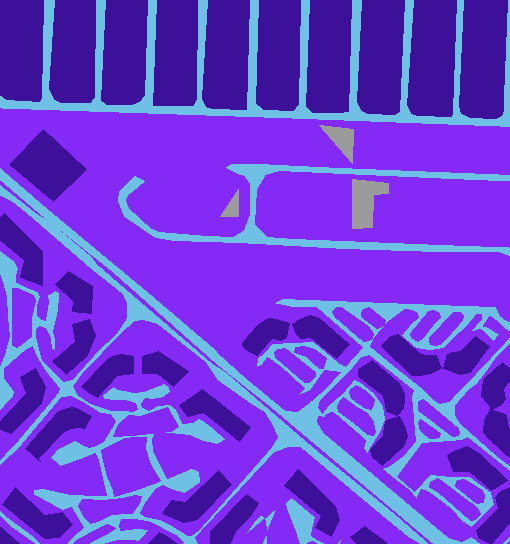

In [ ]:
mask = cv2.imread(f'{dataset_root_folder}{dataset_name}/Tile 2/masks/image_part_002.png')
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
mask

In [ ]:
image_patch = 256

In [ ]:
((image.shape)[0] // image_patch)

2

In [ ]:
minmaxscaler = MinMaxScaler()

In [ ]:
#image_type = 'images'
#image_extension = 'jpg'
image_dataset = []
mask_dataset = []
for image_type in ['images' , 'masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  elif image_type == 'masks':
     image_extension = 'png'
  for tile_id in range(1,9):
    for image_id in range(1,20):
      image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
      if image is not None:
        if image_type == 'masks':
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #image_dataset.append(image)
        size_x = (image.shape[1] // image_patch)*image_patch
        size_y = (image.shape[0] // image_patch)*image_patch
        image = Image.fromarray(image)
        image = image.crop((0,0, size_x, size_y))
        image = np.array(image)
        patched_images = patchify(image, (image_patch, image_patch, 3), step = image_patch)
        #print('({}, {})'.format(image.size[0], image.size[1]))
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type == 'images':
              single_patch_image = patched_images[i,j,:,:]
              #print(single_patch_image.shape)
              single_patch_image = minmaxscaler.fit_transform(single_patch_image.reshape(-1, single_patch_image.shape[-1])).reshape(single_patch_image.shape)
              single_patch_image = single_patch_image[0]
              #print(single_patch_image)

              image_dataset.append(single_patch_image)
            elif image_type == 'masks':
              individual_patched_mask = patched_images[i,j,:,:]
              individual_patched_mask = individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)


In [ ]:
len(image_dataset)
len(mask_dataset)

1305

In [ ]:
image_dataset[0]

array([[[0.78823529, 0.76470588, 0.74509804],
        [0.88235294, 0.85882353, 0.83921569],
        [0.94509804, 0.90980392, 0.89411765],
        ...,
        [0.89411765, 0.85882353, 0.82352941],
        [0.85882353, 0.83137255, 0.79607843],
        [0.87843137, 0.85098039, 0.81568627]],

       [[0.88627451, 0.8627451 , 0.84313725],
        [0.99607843, 0.97254902, 0.95294118],
        [1.        , 1.        , 0.98431373],
        ...,
        [0.93333333, 0.89803922, 0.8627451 ],
        [0.92941176, 0.90196078, 0.86666667],
        [0.95294118, 0.91764706, 0.88235294]],

       [[0.97254902, 0.94509804, 0.93333333],
        [1.        , 0.98823529, 0.97647059],
        [1.        , 1.        , 0.98431373],
        ...,
        [0.93333333, 0.89411765, 0.86666667],
        [0.92156863, 0.89411765, 0.85882353],
        [0.90196078, 0.86666667, 0.83137255]],

       ...,

       [[0.88235294, 0.8627451 , 0.86666667],
        [0.81960784, 0.80392157, 0.8       ],
        [0.7372549 , 0

In [ ]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [ ]:
len(mask_dataset)

1305

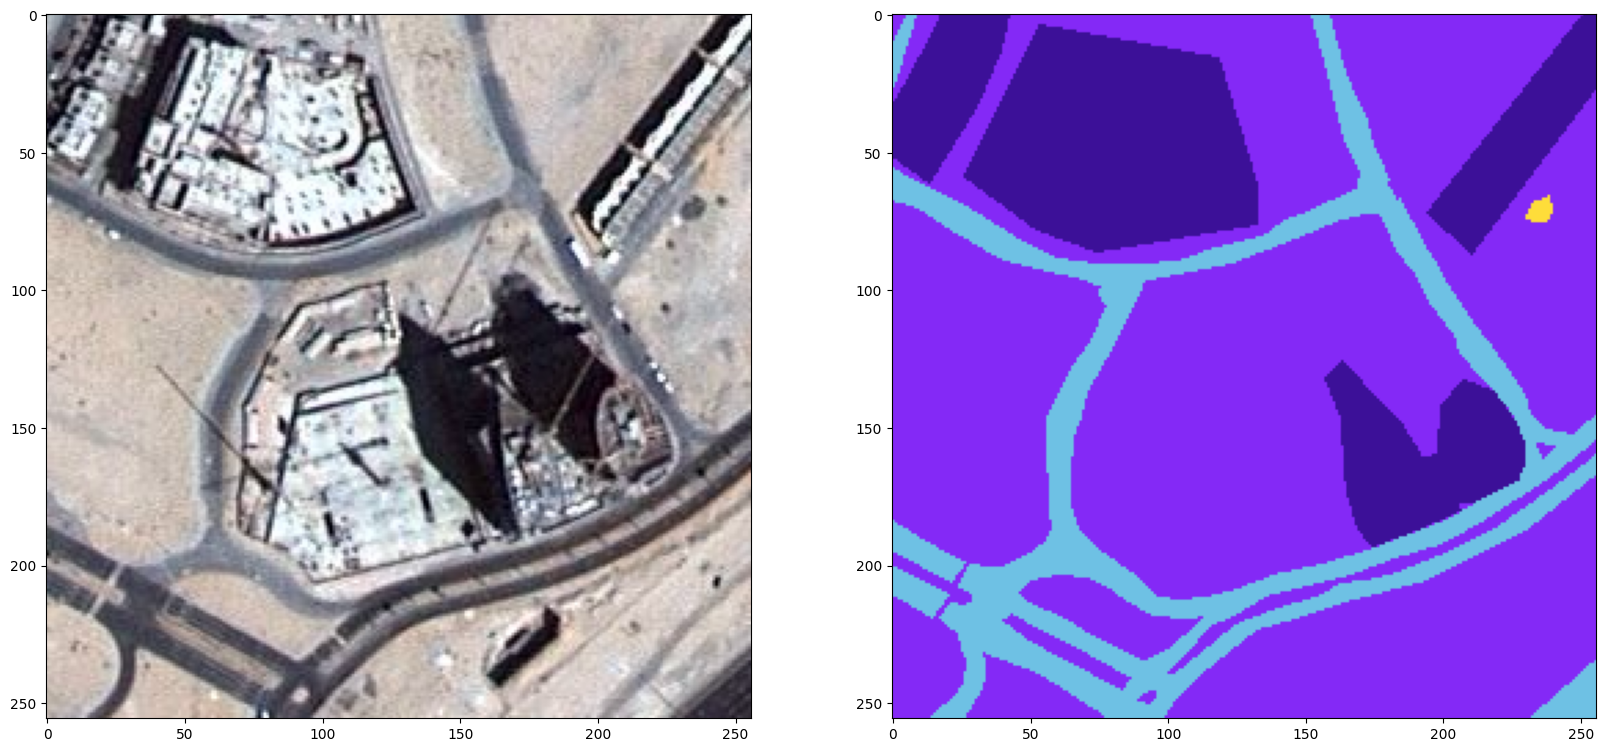

In [ ]:
random_index = random.randint(0, len(image_dataset)-1)
plt.figure(figsize=(20,15))
plt.subplot(121)
plt.imshow(image_dataset[random_index]);

plt.subplot(122)
plt.imshow(mask_dataset[random_index]);
plt.show()

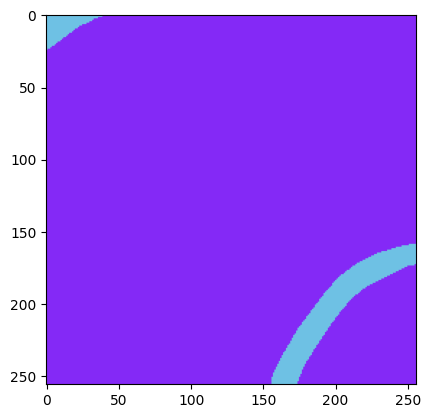

In [ ]:
plt.imshow(mask_dataset[5]);

In [ ]:
class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0,2,4)))
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_unlabeled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [ ]:

#print(len(labels))

In [ ]:
label = individual_patched_mask

In [ ]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape, dtype=np.uint8)
  label_segment[np.all(label == class_water, axis=-1)] = 0
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_road, axis=-1)] = 2
  label_segment[np.all(label == class_building, axis=-1)] = 3
  label_segment[np.all(label == class_vegetation, axis=-1)] = 4
  label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
  #print(label_segment)
  label_segment = label_segment[:,:,0]
  #print(label_segment)
  return label_segment

In [ ]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)

In [ ]:
labels = np.array(labels)

In [ ]:
labels = np.expand_dims(labels, axis = 3)

In [ ]:
labels

array([[[[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        ...,

        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]]],


       [[[1],
         [5],
         [5],
         ...,
         [0],
         [0],
         [0]],

        [[1],
         [5],
         [5],
         ...,
         [0],
         [0],
         [0]],

        [[1],
         [1],
         [5],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[1],
         [1],
         [1],
         ...,
         [2],


In [ ]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

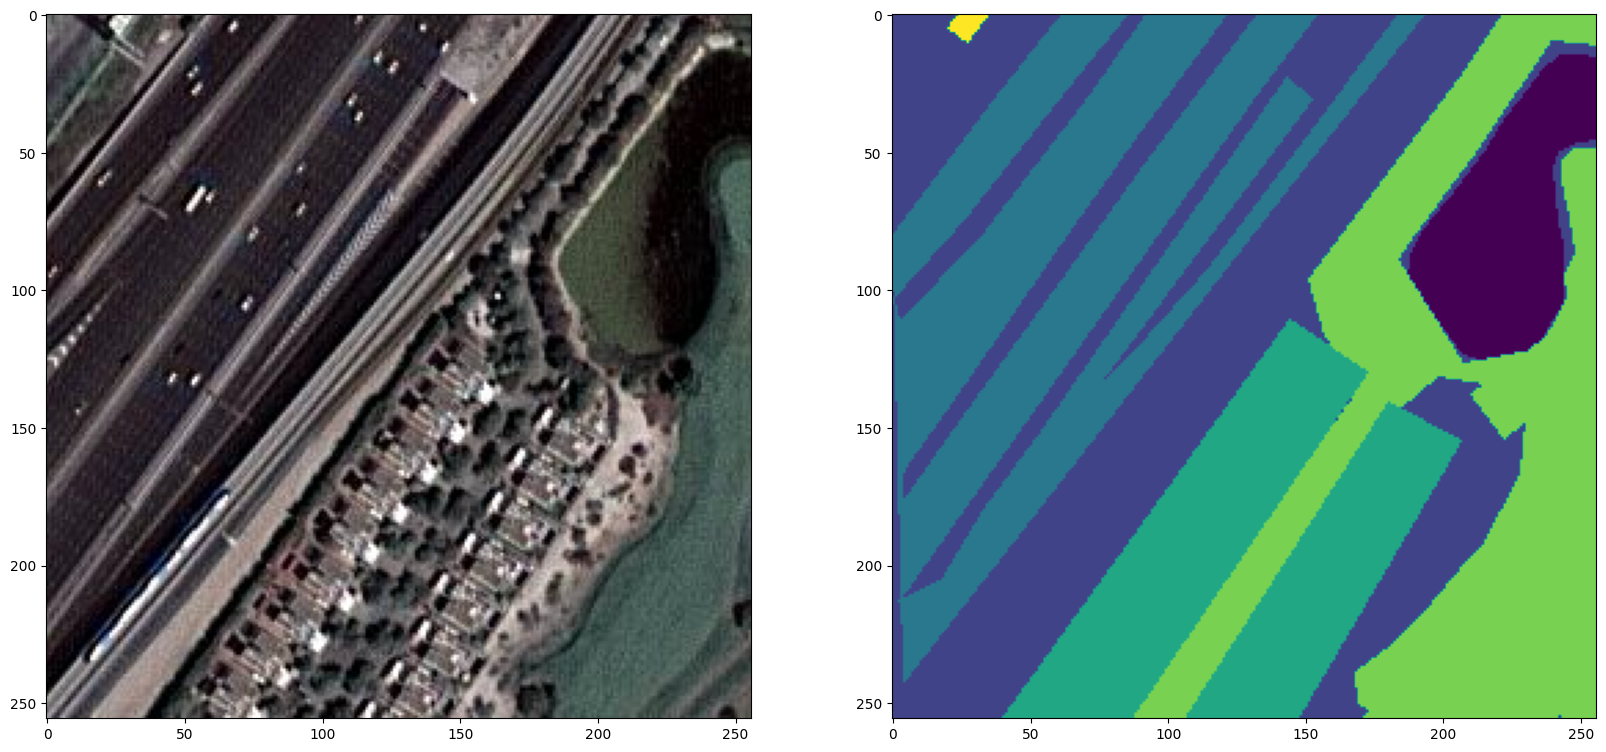

In [ ]:
random_index = random.randint(0, len(image_dataset)-1)
plt.figure(figsize=(20,15))
plt.subplot(121)
plt.imshow(image_dataset[random_index]);

plt.subplot(122)
plt.imshow(labels[random_index][:,:,0]);
plt.show()

In [ ]:
total_classes = len(np.unique(labels))
total_classes

6

In [ ]:
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)

In [ ]:
master_training_dataset = image_dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_text, y_train, y_test = train_test_split(image_dataset, labels_categorical_dataset, test_size = 0.20, random_state = 42)